## Netflix Notebook
- @RodrigoLaraG
- 25/07

## Introdução

### Descritivo dos Datasets

#### Credits
- `person_id`
- `id` = movie-show id
- `name`
- `character` = só p/ `character-ACTOR`
- `role` = ACTOR/DIRECTOR

#### Titles
- `id` = movie-show id
- `title`
- `type` = SHOW/MOVIE
- `description` = descrição (max len?) ~20missing
- `release year`
- `age_certification` = 11 tipos, não ordenados, procurar entender qual a ordem ~2600 missing
- `runtime` = duração 
- `genres` = ? gêneros ?, fazer a separação
- `production_countries` = ? países possíveis ?, fazer a separação (os menos colocar outros?), coluna p/ coproduções
- `seasons` = temporadas, só válido p/ `type-SHOW`
- `imdb_id` = ??? ~450missing
- `imdb_score` = nota imdb ~500missing
- `imdb_votes` = quantidade de avaliações??? ~550missing
- `tmdb_popularity` = ??? ~100missing
- `tmdb_score` = nota ~300missing

imdb = Internet Movie Database

tmdb = The Movie Database

## Perguntas a serem respondidas

Uma lista de possíveis perguntas/explorações a serem feitas em cima desses dados, acabam sendo algumas possíveis curiosidades

- Qual Ator/Diretor mais bem/mal avaliado?
- Qual Ator/Diretor com a carreira mais longínqua?
- Qual a combinação de Ator/Diretor - Ator/Ator mais frequentes?
- Qual Ator/Diretor participou de mais filmes/séries?
- Qual Ator/Diretor mais popular (em questão de soma de avaliações)? e Qual o score-médio?

.
- Qual o gênero mais aclamado? Existe correlação?
- Qual o gênero mais popular? Existe Correlação?
- Qual é a combinação de gêneros mais aclamado/popular/comum?
- Quais os países mais prolíficos? e os mais aclamados
- Qual a combinação de coproduções mais comum/popular/aclamada
- Existe correlação entre # temporadas e avaliação? e popularidade?
- Qual a divisão de filmes/series por gênero? e por classificação etária?
- Existe correlação entre classificação etária e avaliação? e duração?
- Qual a progressão da avaliação/duração/etc com os anos? 
- Existe correlação entre popularidade e avaliação?
- Existe coralação entre gênero e # temporadas?
- Qual a correlação entre notas do imdb/tmdb, e entre popularidade-votes?


## Importação dos Dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={"figure.figsize":(8, 8)})

In [3]:
credits = pd.read_csv("credits.csv")
titles = pd.read_csv("titles.csv")

In [4]:
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [5]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [6]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [7]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [8]:
# Divisão entre ACTOR/DIRECTOR dos créditos
credits.role.value_counts()

ACTOR       72690
DIRECTOR     4523
Name: role, dtype: int64

In [9]:
#quantidade de pessoas únicas (ps. será q tem mts pessoas duplicadas?)
credits.person_id.nunique()

53956

In [10]:
# Divisão entre MOVIE/SHOW
titles.type.value_counts()

MOVIE    3759
SHOW     2047
Name: type, dtype: int64

### Data Tidying

#### Criando uma get_dummies dos generos, pra considerar na hora de avaliar

total de gêneros = 19

In [11]:
genres = titles.genres.str.rstrip("]")
genres = genres.str.lstrip("[")
genres = genres.str.get_dummies(", ")
genres.head()

,'action','animation','comedy','crime','documentation','drama','european','family','fantasy','history','horror','music','reality','romance','scifi','sport','thriller','war','western'
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [12]:
genres.columns = genres.columns.str.strip("\'")

In [13]:
genres.columns

Index(['action', 'animation', 'comedy', 'crime', 'documentation', 'drama',
       'european', 'family', 'fantasy', 'history', 'horror', 'music',
       'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western'],
      dtype='object')

In [14]:
genres.sum().sort_values(ascending = False)

drama            2901
comedy           2269
thriller         1178
action           1053
romance           958
documentation     910
crime             891
animation         665
fantasy           631
family            622
scifi             587
european          460
horror            380
music             238
history           233
reality           223
sport             166
war               149
western            44
dtype: int64

#### Criando uma get_dummies dos production_countries, pra considerar na hora de avaliar

qual limite uar p/ considerar um país como "other" ?

In [15]:
countries = titles.production_countries.str.rstrip("]")
countries = countries.str.lstrip("[")
countries = countries.str.get_dummies(", ")
countries.head()

,'AE','AF','AL','AO','AR','AT','AU','BD','BE','BF',...,'TZ','UA','US','UY','VA','VE','VN','XX','ZA','ZW'
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [16]:
countries.columns = countries.columns.str.strip("\'")

In [17]:
countries.sum().sort_values(ascending = False)

US    2327
IN     629
GB     406
JP     291
FR     248
      ... 
MU       1
MW       1
MZ       1
NA       1
ZW       1
Length: 107, dtype: int64

Quantidades de paises com mais de X filmes

- \>10 = 50
- \>20 = 35
- \>50 = 20

IN é international?

In [18]:
# países com mais instâncias no dataset
countries.sum()[countries.sum() > 50].sort_values(ascending = False)

US    2327
IN     629
GB     406
JP     291
FR     248
CA     216
KR     216
ES     212
DE     139
MX     123
CN     104
BR      98
PH      85
AU      83
IT      81
TR      80
NG      75
AR      71
TW      61
ID      58
dtype: int64

In [19]:
# criando indexes p/ separação dos países menos populares em um "OTHER"
top20 = countries.sum()[countries.sum() > 50].index
excluded20 = countries.sum()[countries.sum() < 50].index

In [20]:
# função merda pq a lambda não esta indop sei la pq
def others(row):
    for x in row:
        if x >= 1 : return 1
        else: return 0

In [21]:
countries["OTHERS"] = countries[excluded20].apply(others,  axis = 1 )

In [22]:
# Cria um novo df onde todos os paises com menos de 50 filmes são classificados como "other"
countries20 = pd.concat([countries[top20], countries.OTHERS], axis = 1)
countries20.head()

,AR,AU,BR,CA,CN,DE,ES,FR,GB,ID,...,IT,JP,KR,MX,NG,PH,TR,TW,US,OTHERS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Ordenando/entendendo o age_certification

entender se filmes antigos/estrangeiros não tem a certificação etária, descobrir qual a ordenação p/ os que tem

In [23]:
# Classificações etárias, qual a ordem delas?
titles.age_certification.value_counts()

TV-MA    841
R        575
TV-14    470
PG-13    440
PG       246
TV-PG    186
G        131
TV-Y7    112
TV-Y     105
TV-G      76
NC-17     14
Name: age_certification, dtype: int64

##### Significados das classificações etárias

*Show de tv*

- TV-Y : INFANTIL
- TY-Y7 : INFANTIL +7
- TV-G : TODOS OS PÚBLICOS
- TV-PG : ORIENTAÇÃO PARENTAL
- TV-14 : MAIORES DE 14
- TV-MA : MAIORES DE 17

*Filmes*
- G : TODOS OS PUBLICOS
- PG : ORIENTAÇÃO PARENTAL
- PG-13 : MAIORES DE 13
- R : MAIORES DE 17
- NC-17 : ADULTOS

**Proposta de Junção/Equivalência**
- TV-Y + TV-Y7
- G == TV-G
- TV-PG == PG
- TV-14 == PG-13
- TV-MA == R == NC-17 

##### Quais as instâncias que não possuem restrição etária?

In [24]:
titles[titles.age_certification.isna()].release_year.value_counts()

2019    466
2020    408
2018    352
2021    345
2017    306
       ... 
1966      1
1968      1
1992      1
1978      1
1961      1
Name: release_year, Length: 62, dtype: int64

In [25]:
titles[titles.age_certification.isna()].production_countries.value_counts()

['US']                623
['IN']                374
[]                    154
['KR']                 83
['ES']                 79
                     ... 
['SG', 'PH']            1
['DE', 'IN', 'AT']      1
['BE', 'GB', 'US']      1
['GB', 'NL']            1
['FR', 'RU', 'US']      1
Name: production_countries, Length: 292, dtype: int64

In [26]:
titles["age_new"] = titles.age_certification
titles.age_new[(titles.age_new == "TV-Y")|(titles.age_new == "TV-Y7")] = "Y"
titles.age_new[(titles.age_new == "G")|(titles.age_new == "TV-G")] = "G"
titles.age_new[(titles.age_new == "PG")|(titles.age_new == "TV-PG")] = "PG"
titles.age_new[(titles.age_new == "PG-13")|(titles.age_new == "TV-14")] = "T"
titles.age_new[(titles.age_new == "NC-17")|(titles.age_new == "TV-MA")|(titles.age_new == "R")] = "A"
titles.age_new = titles.age_new.fillna("NO RATING")

titles.age_new = pd.Categorical(titles.age_new, ["NO RATING", "Y", "G", "PG", "T", "A"], 
    ordered= True)

<ipython-input-26-4f4c63563a78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles.age_new[(titles.age_new == "TV-Y")|(titles.age_new == "TV-Y7")] = "Y"
<ipython-input-26-4f4c63563a78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles.age_new[(titles.age_new == "G")|(titles.age_new == "TV-G")] = "G"
<ipython-input-26-4f4c63563a78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles.age_new[(titles.age_new == "PG")|(title

vou fazer uma rápida EDA nop que já tenho, antes de voltar aqui

In [27]:
# criando um index "útil" p/ próximas etapas
usef_index = ['id', 'title', 'type', 'release_year', 'age_new', 'runtime', 'seasons',
 'imdb_score', 'tmdb_score', 'imdb_votes_log', 'tmdb_pop_log']

## EDA

#### Exploração Inicial das variáveis numericas


<AxesSubplot:xlabel='release_year', ylabel='Count'>

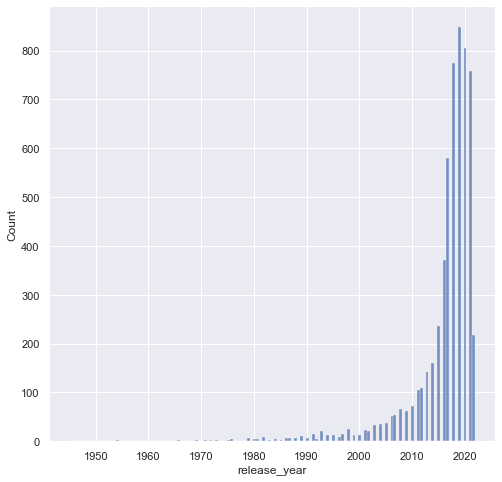

In [28]:
sns.histplot(titles, x = "release_year")

<AxesSubplot:xlabel='release_year', ylabel='Count'>

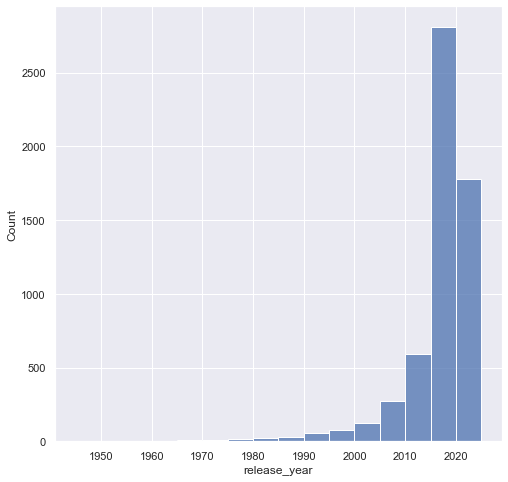

In [29]:
sns.histplot(titles, x = "release_year", binwidth=5)

##### release_year comments

- Os dados pesam mais p/ filmes/show mais novos (a partir de ~2015)
- Filmes/shows muito novos ainda não foram incluídos (depois de ~2020)

<AxesSubplot:xlabel='runtime', ylabel='Count'>

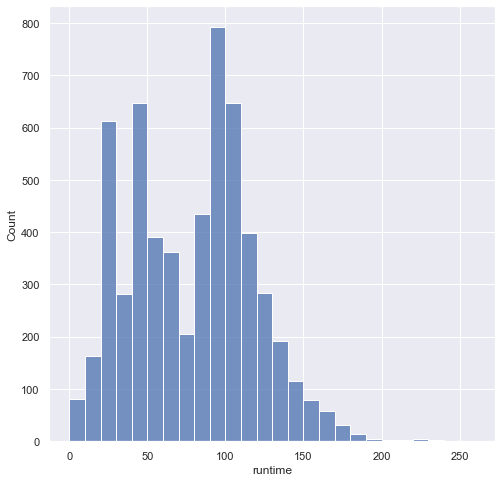

In [30]:
sns.histplot(titles, x = "runtime", binwidth=10)

<AxesSubplot:xlabel='runtime', ylabel='Count'>

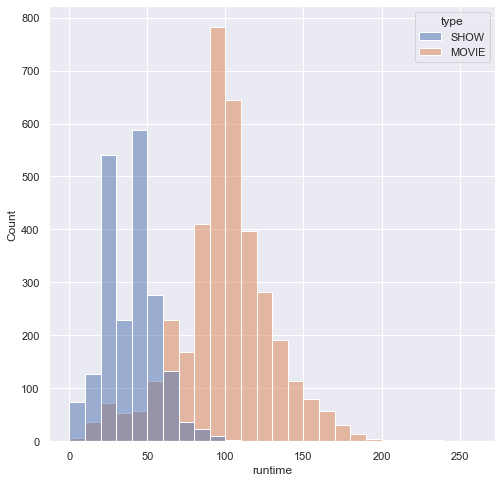

In [31]:
sns.histplot(titles, x = "runtime", binwidth=10, hue="type")

<AxesSubplot:xlabel='runtime', ylabel='Count'>

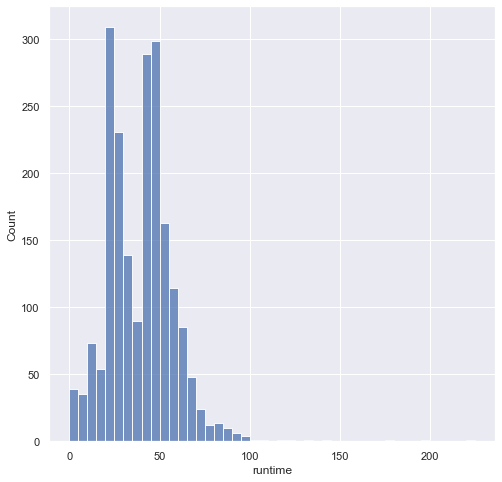

In [32]:
sns.histplot(titles[titles.type == "SHOW"], x = "runtime", binwidth=5)

<AxesSubplot:xlabel='runtime', ylabel='Count'>

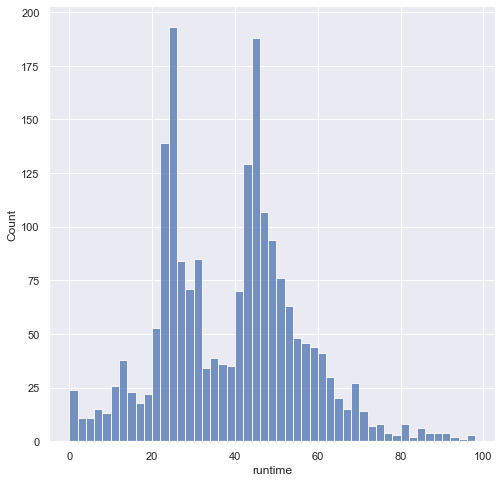

In [33]:
sns.histplot(titles[(titles.type == "SHOW")&(titles.runtime < 100)], x = "runtime", binwidth=2)

##### runtime comments

- Existe uma diferença entre a duração de filmes/shows
- A duração de shows é bimodal, considerando que existem dois tipos "padrão de duração"     
    - (26-28)min e (44-46)min

<AxesSubplot:xlabel='seasons', ylabel='count'>

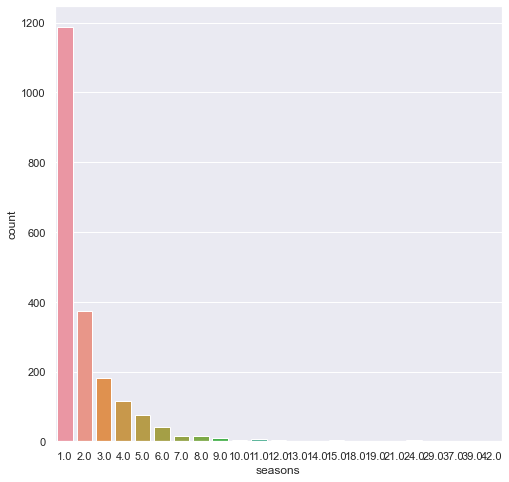

In [34]:
sns.countplot(data = titles, x = "seasons")

<AxesSubplot:xlabel='seasons', ylabel='count'>

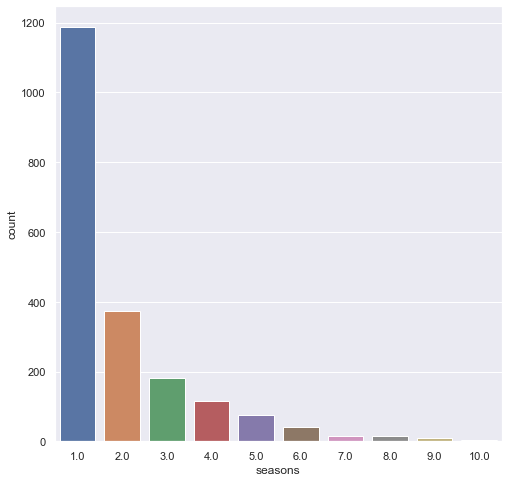

In [35]:
sns.countplot(data = titles[titles.seasons < 11], x = "seasons")

Qual a % de shows com apenas 1 temp, e com mais de 8?

In [36]:
# apenas 1 temp
100*titles.seasons[titles.seasons == 1].count()/titles.seasons.count()

57.98729848558867

In [37]:
# mais de 8 temporadas
100*titles.seasons[titles.seasons > 8].count()/titles.seasons.count()

2.1006350757205667

### Categóricas não-binárias  `genres` e `countries20`

In [38]:
titles_full = pd.concat([titles, genres, countries20], axis = 1)
titles_full.drop(columns=["description", "age_certification", "imdb_id", "genres", 
    "production_countries", "imdb_votes", "tmdb_popularity"], inplace = True)

#titles_full.info()

In [39]:
titles_full.columns

Index(['id', 'title', 'type', 'release_year', 'runtime', 'seasons',
       'imdb_score', 'tmdb_score', 'age_new', 'action', 'animation', 'comedy',
       'crime', 'documentation', 'drama', 'european', 'family', 'fantasy',
       'history', 'horror', 'music', 'reality', 'romance', 'scifi', 'sport',
       'thriller', 'war', 'western', 'AR', 'AU', 'BR', 'CA', 'CN', 'DE', 'ES',
       'FR', 'GB', 'ID', 'IN', 'IT', 'JP', 'KR', 'MX', 'NG', 'PH', 'TR', 'TW',
       'US', 'OTHERS'],
      dtype='object')

#### Genres Covariance

In [40]:
genres_cor = genres.cov()
# genres_cor.head(19)

<AxesSubplot:>

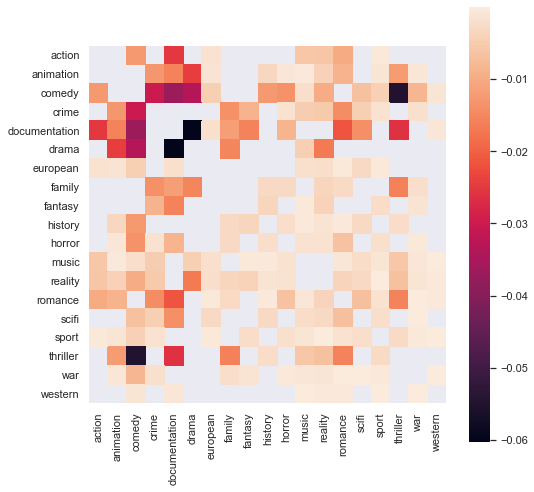

In [41]:
sns.heatmap(genres_cor[genres_cor < 0], square=True)

<AxesSubplot:>

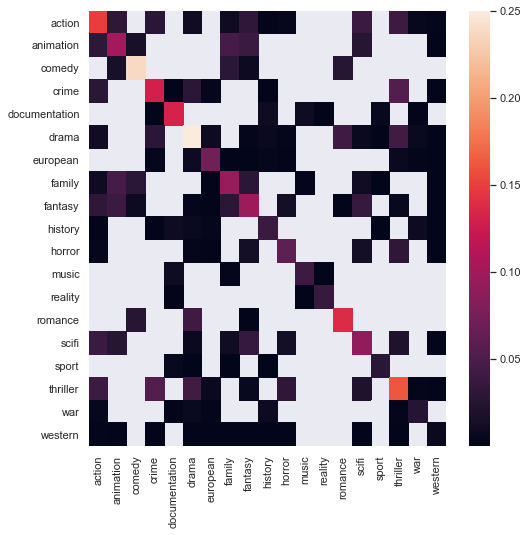

In [42]:
sns.heatmap(genres_cor[genres_cor > 0])

<AxesSubplot:>

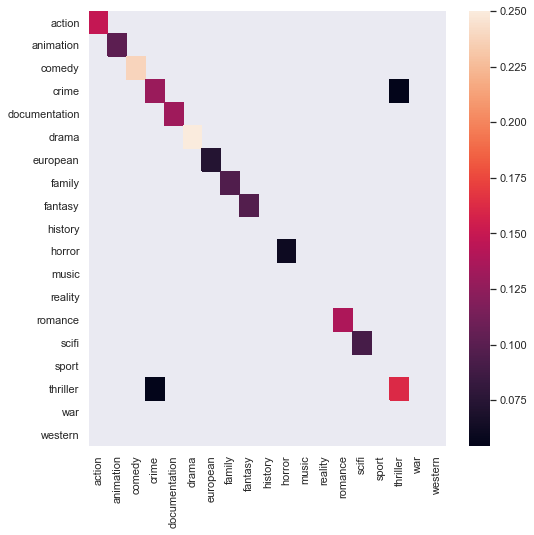

In [43]:
sns.heatmap(genres_cor[genres_cor > 0.05])

<AxesSubplot:>

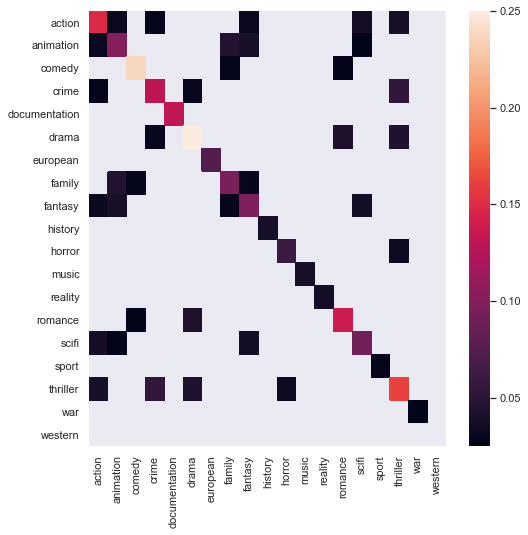

In [44]:
sns.heatmap(genres_cor[genres_cor > 0.025])

<AxesSubplot:>

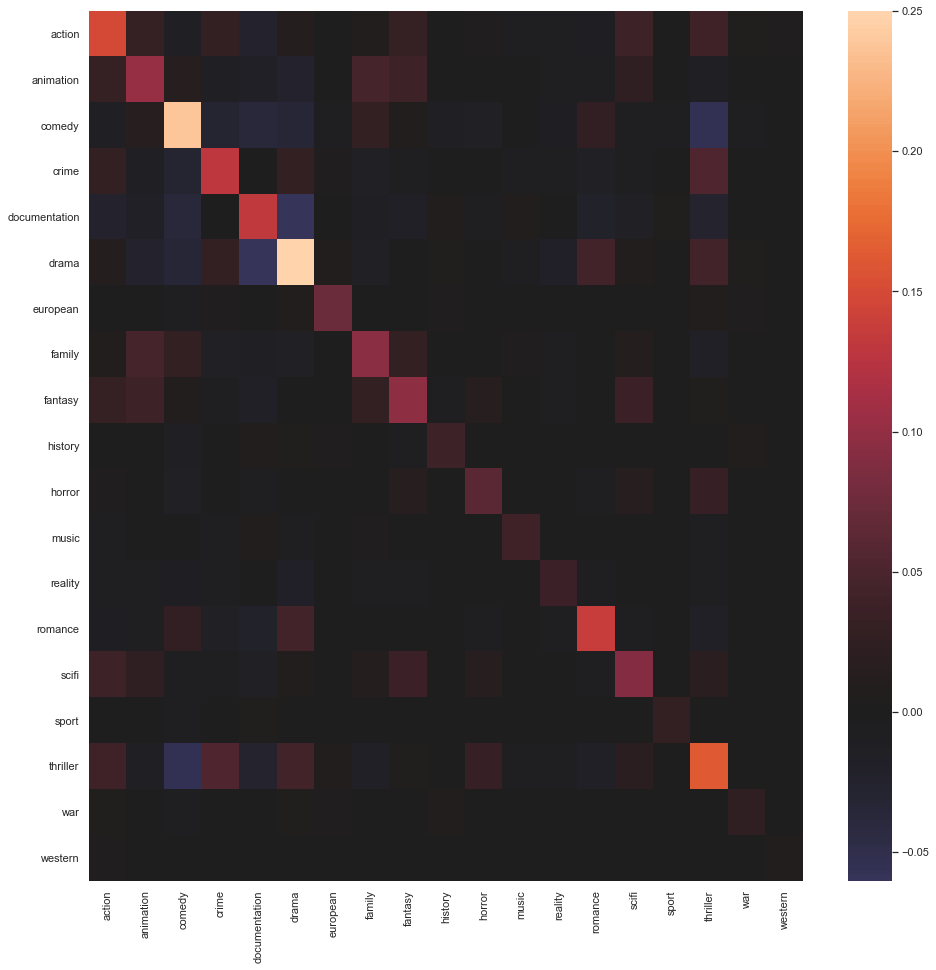

In [45]:
plt.figure(figsize=(16,16))
sns.heatmap(genres_cor, center = 0)

In [46]:
# categorias que são mais raramente colocadas em pares
genres_cor[genres_cor < 0].count().sort_values(ascending = False)

reality          16
music            15
romance          15
sport            14
comedy           14
documentation    12
war              12
animation        12
crime            11
horror           11
history          10
scifi            10
european          9
family            9
thriller          9
action            7
fantasy           7
western           7
drama             6
dtype: int64

In [47]:
# genres_cor["\'reality\'"][genres_cor["\'reality\'"]> 0].index

In [48]:
# titles_full[(titles_full["\'reality\'"] == 1)].info()

In [49]:
# titles_full[["id", "title", '\'documentation\'', '\'music\'', '\'reality\'']].head(20)

In [50]:
#titles_full[(titles_full["\'reality\'"] == 1) &
#(titles_full[genres_cor["\'reality\'"][genres_cor["\'reality\'"]> 0].index] == 1)]

In [51]:
# categorias de gêneros que mais estão em pares
genres_cor[genres_cor > 0].count().sort_values(ascending = False)

drama            13
action           12
fantasy          12
western          12
european         10
family           10
thriller         10
scifi             9
history           9
crime             8
horror            8
documentation     7
animation         7
war               7
comedy            5
sport             5
music             4
romance           4
reality           3
dtype: int64

#### Countries Covariance

In [52]:
countries_cor = countries20.cov()
countries_cor.head(21)

,AR,AU,BR,CA,CN,DE,ES,FR,GB,ID,...,IT,JP,KR,MX,NG,PH,TR,TW,US,OTHERS
AR,0.012081,-0.000175,0.000138,-0.000283,-0.000219,0.000224,0.001621,-0.000006,-0.000855,-0.000122,...,0.000174,-0.000613,-0.000455,0.000085,-0.000158,-0.000179,-0.000169,-0.000129,-0.004385,-0.000044
AU,-0.000175,0.014094,-0.000241,-0.000360,-0.000084,0.000002,-0.000522,-0.000438,0.000378,-0.000143,...,-0.000199,-0.000717,-0.000532,-0.000303,-0.000185,-0.000209,-0.000197,-0.000150,-0.002974,-0.000052
BR,0.000138,-0.000241,0.016597,-0.000456,-0.000302,-0.000060,-0.000444,-0.000032,-0.001181,-0.000169,...,-0.000063,-0.000846,-0.000628,-0.000013,-0.000218,-0.000247,-0.000233,-0.000177,-0.005905,-0.000061
CA,-0.000283,-0.000360,-0.000456,0.035825,0.000712,-0.000029,-0.001014,0.000650,0.001016,-0.000199,...,-0.000519,-0.001176,-0.001212,-0.000616,-0.000136,-0.000545,-0.000513,-0.000391,-0.000443,-0.000135
CN,-0.000219,-0.000084,-0.000302,0.000712,0.017595,-0.000084,-0.000310,-0.000421,-0.000047,-0.000007,...,-0.000250,-0.000553,-0.000667,-0.000380,-0.000231,-0.000262,-0.000247,0.000329,-0.003218,-0.000065
DE,0.000224,0.000002,-0.000060,-0.000029,-0.000084,0.023372,-0.000013,0.002078,0.001771,-0.000239,...,0.000355,-0.001200,-0.000891,-0.000335,-0.000137,-0.000351,-0.000330,-0.000252,-0.003395,-0.000087
ES,0.001621,-0.000522,-0.000444,-0.001014,-0.000310,-0.000013,0.035187,0.000852,-0.001865,-0.000365,...,0.000007,-0.001830,-0.001359,0.000260,-0.000472,-0.000535,-0.000503,-0.000384,-0.012053,-0.000132
FR,-0.000006,-0.000438,-0.000032,0.000650,-0.000421,0.002078,0.000852,0.040897,-0.000059,-0.000427,...,0.001299,-0.001108,-0.001417,-0.000561,-0.000380,-0.000625,-0.000589,-0.000277,-0.011093,0.000018
GB,-0.000855,0.000378,-0.001181,0.001016,-0.000047,0.001771,-0.001865,-0.000059,0.065049,-0.000526,...,-0.000114,-0.002816,-0.002602,-0.001309,-0.000559,-0.001024,-0.000964,-0.000735,-0.005637,-0.000081
ID,-0.000122,-0.000143,-0.000169,-0.000199,-0.000007,-0.000239,-0.000365,-0.000427,-0.000526,0.009892,...,-0.000139,-0.000501,-0.000372,-0.000212,-0.000129,-0.000146,-0.000138,-0.000105,-0.003832,-0.000036


<AxesSubplot:>

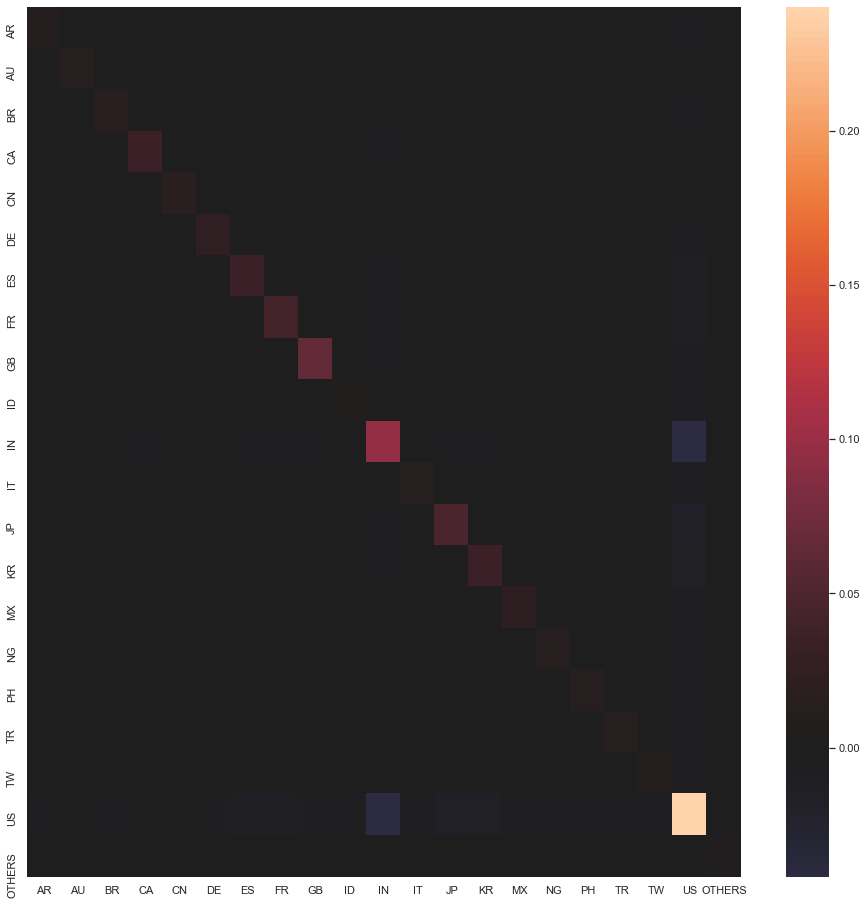

In [53]:
plt.figure(figsize=(16,16))
sns.heatmap(countries_cor, center = 0)

<AxesSubplot:>

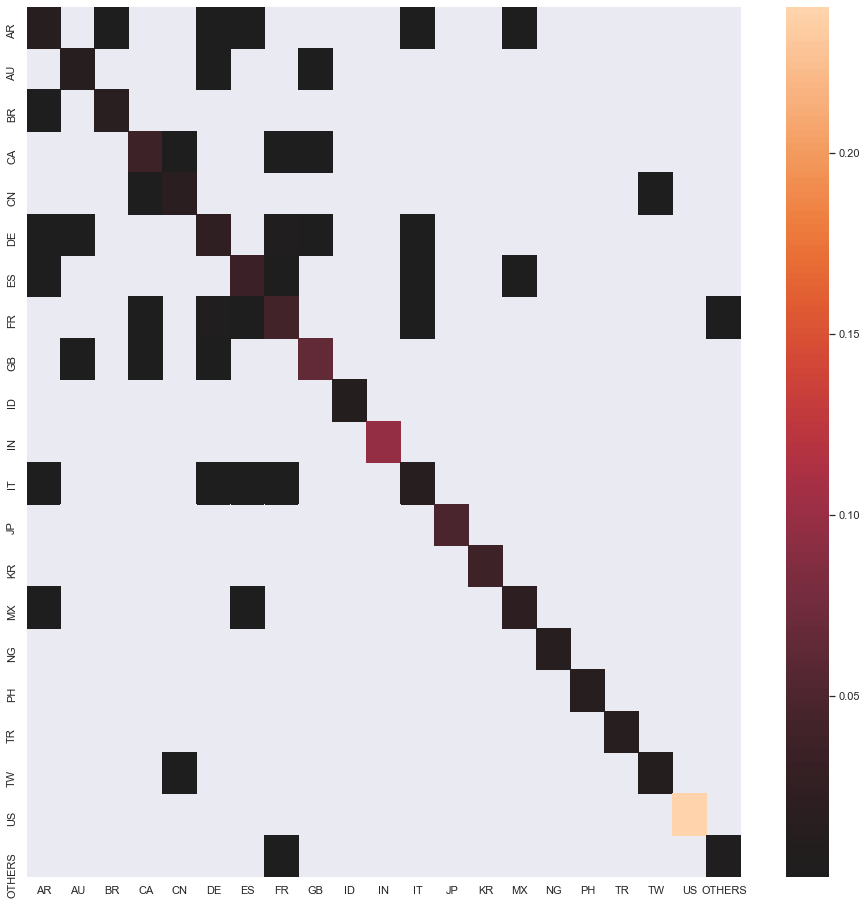

In [54]:
plt.figure(figsize=(16,16))
sns.heatmap(countries_cor[countries_cor > 0], center = 0)

In [55]:
# paises que mais fazem coproduções internacionais
countries_cor[countries_cor > 0].count().sort_values(ascending = False)

AR        6
DE        6
FR        6
IT        5
ES        5
CA        4
GB        4
CN        3
MX        3
AU        3
TW        2
OTHERS    2
BR        2
JP        1
KR        1
ID        1
NG        1
PH        1
TR        1
US        1
IN        1
dtype: int64

### Correlações de avaliações/popularidade/etc

<AxesSubplot:ylabel='Density'>

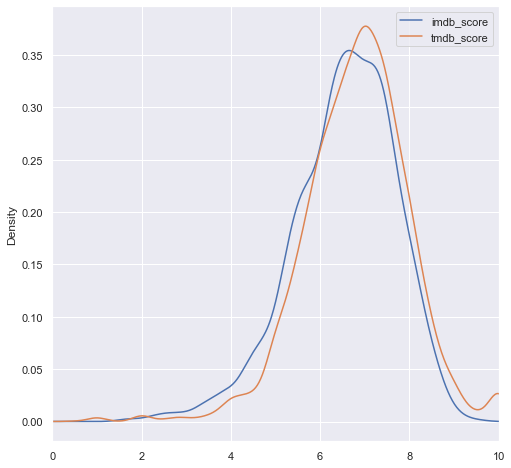

In [56]:
# comparação do perfil de notas entre imdb e tmdb
titles[["imdb_score", "tmdb_score"]].plot.kde(xlim = [0, 10])

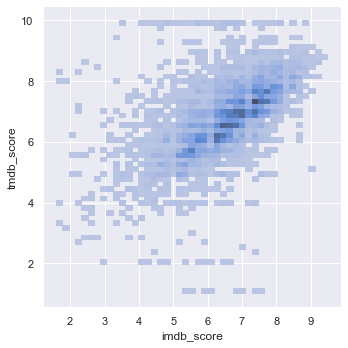

In [57]:
# comparação entre perfil de notas entre imdb e tmdb
sns.displot(data = titles, x = "imdb_score", y = "tmdb_score")

In [58]:
titles[["imdb_votes", "tmdb_popularity"]].describe()

,imdb_votes,tmdb_popularity
count,5.267000e+03,5712.000000
mean,2.340719e+04,22.525660
std,8.713432e+04,68.849177
min,5.000000e+00,0.009442
25%,5.210000e+02,3.155250
50%,2.279000e+03,7.478000
75%,1.014400e+04,17.775750
max,2.268288e+06,1823.374000


In [59]:
titles[["imdb_votes", "tmdb_popularity"]].quantile(0.9)

imdb_votes         48469.4000
tmdb_popularity       45.5213
Name: 0.9, dtype: float64

In [60]:
titles[["imdb_votes", "tmdb_popularity"]].quantile(0.95)

imdb_votes         115896.10000
tmdb_popularity        79.14585
Name: 0.95, dtype: float64

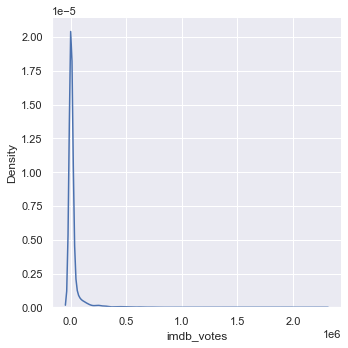

In [61]:
# full hist plot for imdb_votes, extremely right skewed
sns.displot(data = titles, x = "imdb_votes", kind = "kde")

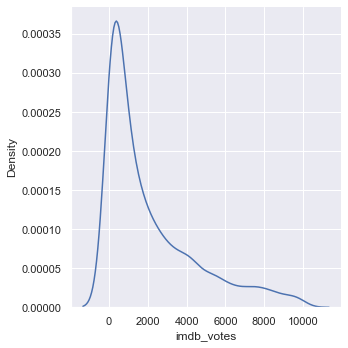

In [62]:
# 75% quantile hist plot for imdb_votes, right skewed
sns.displot(data = titles[titles.imdb_votes < 10000], x = "imdb_votes", kind = "kde")

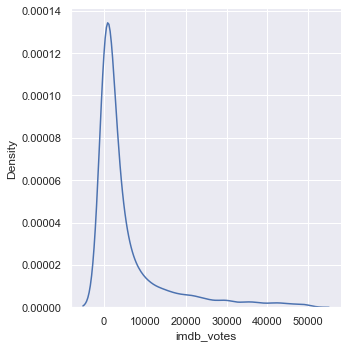

In [63]:
# 90% quantile hist plot for imdb_votes, highly right skewed
sns.displot(data = titles[titles.imdb_votes < 50000], x = "imdb_votes", kind = "kde")

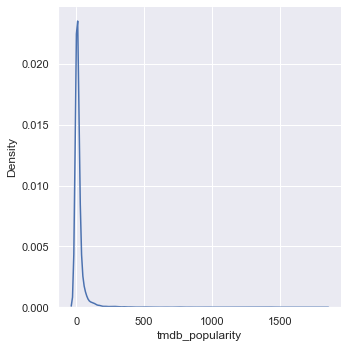

In [64]:
# full hist plot for tmdb_popularity, extremely right skewed
sns.displot(data = titles, x = "tmdb_popularity", kind = "kde")

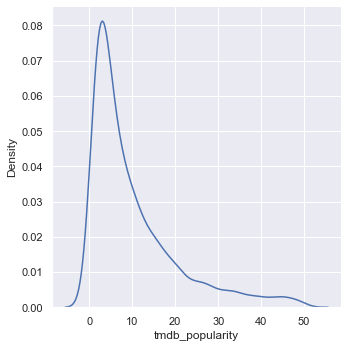

In [65]:
# 90% quantile hist plot for tmdb_popularity, highly right skewed
sns.displot(data = titles[titles.tmdb_popularity < 50], x = "tmdb_popularity", kind = "kde")

##### Transformação Log de `imdb_votes` e `tmdb_popularity`

In [66]:
from sklearn.preprocessing import PowerTransformer
log_transformer1 = PowerTransformer()
log_transformer2 = PowerTransformer()

imdb_votes_log = log_transformer1.fit_transform(np.reshape(titles.imdb_votes.values, (-1,1)))
tmdb_pop_log = log_transformer2.fit_transform(np.reshape(titles.tmdb_popularity.values, (-1,1)))

In [67]:
titles["imdb_votes_log"] = imdb_votes_log
titles["tmdb_pop_log"] = tmdb_pop_log

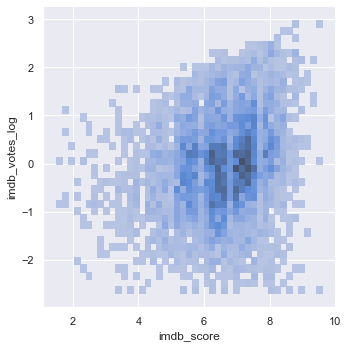

In [68]:
sns.displot(data = titles, x = "imdb_score", y = "imdb_votes_log")

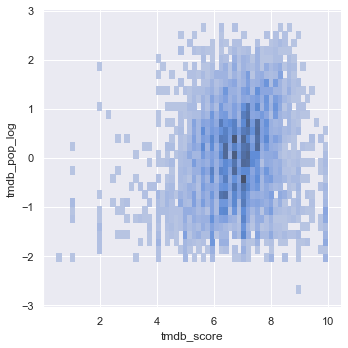

In [69]:
sns.displot(data = titles, x = "tmdb_score", y = "tmdb_pop_log")

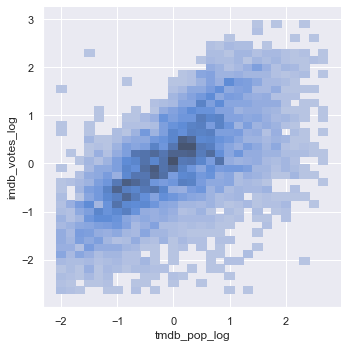

In [70]:
sns.displot(data = titles, x = "tmdb_pop_log", y = "imdb_votes_log")

#### Considerações sobre Scores e Qtd. Votos/Popularidade

- A escala de de grandezas do `imdb_votes` é grande (0-2mi), o que torna necessário usar uma transformação p/ comparação
- Já a popularidade no tmdb é fruto de algum algoritmo, apesar disso ela também tem seus itens mais popularidades com `popularidade` muito maior
- O tmdb tem um perfil de notas ligeriamente mais "generoso" que o imdb, além de apresentar alguns filmes com "nota 10", da mesma maneira parece apresentar alguns filmes "nota 0"

.
- P/ o `imdb`
    - filmes com mais avaliações tendem a ser melhor avaliados
    - filmes que tem uma quantidade de avaliações medianas tendem a ter notas mais "medianas" (6-7)
    - outra característica é que apresentam uma amplitude de notas maior (apresentam também as piores notas)
    - filmes com poucas avaliações aparentemente não tem uma nota mediana clara

.
- P/ o `tmdb`
    - ao contrário do imdb, of filmes com mais avaliações não aparentam ser melhor avaliados
    - outra característica que diferencia os dois, é que existem muito menos filmes com notas inferiores à ~5
    - os filmes menos avaliados também apresentam modas nas notas "inteiras", além de apresentar alguns filmes "nota 10"

.
- Em relação à medida de popularidade entre os dois:
    - ambos possuem "outliers", ou seja, filmes que são populares em uma plataforma, mas não na outra, mas aparentemente o tmdb apresenta uma quantidasde maior dos mesmos


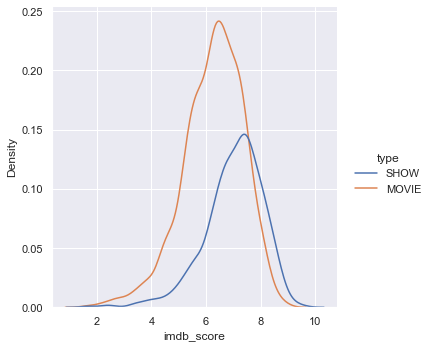

In [71]:
sns.displot(data = titles, x = "imdb_score", hue = "type", kind="kde")

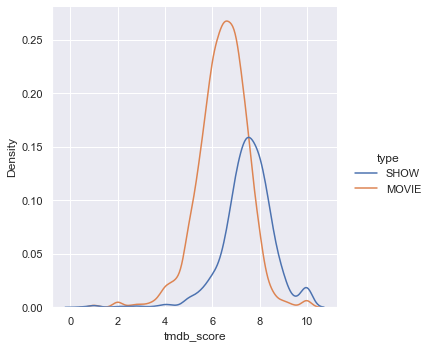

In [72]:
sns.displot(data = titles, x = "tmdb_score", hue = "type", kind="kde")

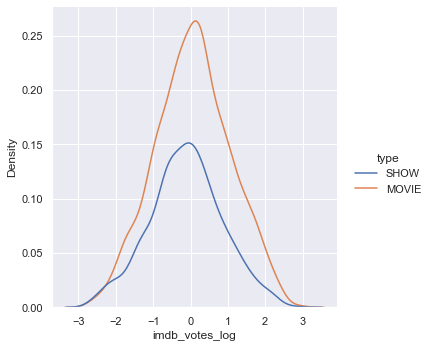

In [73]:
sns.displot(data = titles, x = "imdb_votes_log", hue = "type", kind="kde")

#### Consluões sobre influência de `show/movie` nas avaliações

Tanto para `imdb` quanto para `tmdb` há uma diferençã significativa no perfil das avaliações, em ambos a média para filme está em torno de 6,5, enquanto para séries, fica mais próximo de 7,5

Uma diferença é que as avaliações no `tmdb` caem mais abruptamente após nota 4 p/ filmes, e 5 p/ séries

Em questão de quantidade de avaliações, séries tendem a ser menos avaliadas em ambos os casos

### Credits

**Criar uma Tabela única com informações interessantes "pós-groupby"**

- `mean`
    - `release_year`
    - `runtime`
    - `seasons`
    - `imdb_score`
    - `tmdb_score`
    - `imdb_votes_log`
    - `tmdb_pop_log`
- `max`
    - `release_year`
    - `runtime`
    - `seasons`
    - `imdb_score`
    - `tmdb_score`
    - `imdb_votes_log`
    - `tmdb_pop_log`
- `min`
    - `release_year`
    - `runtime`
    - `seasons`
    - `imdb_score`
    - `tmdb_score`
    - `imdb_votes_log`
    - `tmdb_pop_log`
- `range` **nova coluna resultante de max-min**
- `count`
- `quantile` ? **usar para verificar individuos mais consistentes**


In [74]:
# join entre credits e titles p/ obter metricas de cada individuo 
credits_joined = pd.merge(credits, titles[usef_index], how="left", left_on="id", 
    right_on="id")
# credits_joined.head()

In [75]:
# cria colunas individuais p/ as duas categorias binarias (deveria ter usado um get_dummies, depois trocar)
credits_joined["actor_count"] = np.nan
credits_joined["actor_count"][credits_joined.role == "ACTOR"] = 1
credits_joined["director_count"] = np.nan
credits_joined["director_count"][credits_joined.role == "DIRECTOR"] = 1
credits_joined["movie_count"] = np.nan
credits_joined["movie_count"][credits_joined.type == "MOVIE"] = 1
credits_joined["show_count"] = np.nan
credits_joined["show_count"][credits_joined.type == "SHOW"] = 1


<ipython-input-75-72bcfbb68591>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credits_joined["actor_count"][credits_joined.role == "ACTOR"] = 1
<ipython-input-75-72bcfbb68591>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credits_joined["director_count"][credits_joined.role == "DIRECTOR"] = 1
<ipython-input-75-72bcfbb68591>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credits_joined["movie_count"][credits_joined.type == "MOVI

In [76]:
# cria nova df credits_stats p/ agregar as estatisticas de cada individuo
credits_stats = credits[["person_id", "name"]].drop_duplicates()

# cria colunas zeros p/ poder usar a função de renomeação do pd.merge
credits_stats[["release_year", "runtime", "seasons", "imdb_score", 
    "tmdb_score", "imdb_votes_log", "tmdb_pop_log"]] = 0

# index p/ facilitar nos merges e groupbys
usef_index2 = ["person_id", "release_year", "runtime", "seasons", "imdb_score", 
    "tmdb_score", "imdb_votes_log", "tmdb_pop_log"]

In [77]:
# cria um groupby p/ mean, max e min das colunas de usef_index2, e depois merge no credits_stats
credits_stats = pd.merge(credits_stats, credits_joined[usef_index2].groupby("person_id").mean(), 
    how="left", left_on="person_id", right_on="person_id", suffixes=(None, "_mean"))

credits_stats = pd.merge(credits_stats, credits_joined[usef_index2].groupby("person_id").max(numeric_only = True), 
    how="left", left_on="person_id", right_on="person_id", suffixes=(None, "_max"))

credits_stats = pd.merge(credits_stats, credits_joined[usef_index2].groupby("person_id").min(numeric_only = True), 
    how="left", left_on="person_id", right_on="person_id", suffixes=(None, "_min"))

In [78]:
# faz um count das categorias binárias, e depois merge
credits_stats = pd.merge(credits_stats, credits_joined[["person_id", "movie_count", 
    "show_count", "actor_count", "director_count"]].groupby("person_id").count(), 
        how="left", left_on="person_id", right_on="person_id")

# remove colunas nulas usadas p/ auto-nomeação
credits_stats.drop(columns=["release_year", "runtime", "seasons", "imdb_score", "tmdb_score",
     "imdb_votes_log", "tmdb_pop_log"], inplace=True)

In [79]:
# criação de colunas p/ ranges
credits_stats["release_year_range"] = credits_stats.release_year_max - credits_stats.release_year_min
credits_stats["imdb_score_range"] = credits_stats.imdb_score_max - credits_stats.imdb_score_min
credits_stats["tmdb_score_range"] = credits_stats.tmdb_score_max - credits_stats.tmdb_score_min

In [80]:
credits_stats.columns

Index(['person_id', 'name', 'release_year_mean', 'runtime_mean',
       'seasons_mean', 'imdb_score_mean', 'tmdb_score_mean',
       'imdb_votes_log_mean', 'tmdb_pop_log_mean', 'release_year_max',
       'runtime_max', 'seasons_max', 'imdb_score_max', 'tmdb_score_max',
       'imdb_votes_log_max', 'tmdb_pop_log_max', 'release_year_min',
       'runtime_min', 'seasons_min', 'imdb_score_min', 'tmdb_score_min',
       'imdb_votes_log_min', 'tmdb_pop_log_min', 'movie_count', 'show_count',
       'actor_count', 'director_count', 'release_year_range',
       'imdb_score_range', 'tmdb_score_range'],
      dtype='object')

#### Mais prolíficos e Carreiras mais duradouras

In [81]:
# maior número de filmes
credits_stats[["name", "movie_count", "imdb_score_mean", "imdb_score_max","imdb_votes_log_max", "release_year_range", 
    "release_year_min"]].sort_values(by = ["movie_count"], ascending=False).head(15)

,name,movie_count,imdb_score_mean,imdb_score_max,imdb_votes_log_max,release_year_range,release_year_min
3488,Shah Rukh Khan,30,6.306897,8.1,1.604705,27,1992
7658,Kareena Kapoor Khan,25,6.312000,8.4,2.231442,15,2001
7659,Boman Irani,25,6.468000,8.4,2.231442,17,2004
1353,Anupam Kher,24,6.048000,8.1,2.482406,28,1990
1428,Paresh Rawal,22,6.409091,8.1,1.415552,32,1988
21425,Raúl Campos,21,6.161905,7.5,-0.179638,5,2016
21426,Jan Suter,20,6.145000,7.5,-0.179638,2,2016
9695,Nawazuddin Siddiqui,20,7.166667,8.6,1.584946,16,2004
9011,Priyanka Chopra Jonas,20,6.428571,8.1,1.561841,16,2005
1350,Aamir Khan,19,7.736842,8.7,2.231442,29,1990


In [82]:
# Maior número de shows
credits_stats[["name", "show_count", "imdb_score_mean", "imdb_score_max","imdb_votes_log_max", "release_year_range", 
    "release_year_min"]].sort_values(by = ["show_count"], ascending=False).head(15)

,name,show_count,imdb_score_mean,imdb_score_max,imdb_votes_log_max,release_year_range,release_year_min
6530,Takahiro Sakurai,15,6.895238,8.7,1.451023,15,2006
7689,Junichi Suwabe,15,7.033333,8.3,0.638921,13,2008
11901,Ai Kayano,11,7.420000,8.4,1.297505,9,2011
12477,Yoshimasa Hosoya,11,7.763636,9.0,2.159042,9,2012
13586,Natsuki Hanae,10,7.540000,9.0,2.159042,7,2013
4404,Ashleigh Ball,10,6.790909,8.1,0.972783,16,2005
15420,Kim Mi-kyeong,10,7.654545,8.6,0.981039,9,2013
7687,Maaya Sakamoto,10,6.973333,8.3,0.643983,15,2006
6529,Jun Fukuyama,9,7.516667,8.7,1.451023,15,2006
12352,Kenjiro Tsuda,9,6.700000,8.7,1.823793,10,2011


In [83]:
# carreira mais longa
credits_stats[["name", "movie_count", "imdb_score_mean", "imdb_score_max","imdb_votes_log_max", "release_year_range", 
    "release_year_min"]].sort_values(by = ["release_year_range"], ascending=False).head(15)

,name,movie_count,imdb_score_mean,imdb_score_max,imdb_votes_log_max,release_year_range,release_year_min
382,George Chakiris,2,7.600000,7.7,1.283882,67,1954
192,Audrey Hepburn,2,7.450000,7.8,1.628365,56,1964
530,Narendra Nath,2,6.700000,6.7,-1.035805,54,1966
251,Claudia Cardinale,3,6.650000,7.3,0.864799,54,1966
621,Asrani,5,6.020000,6.9,1.064995,52,1959
533,Lekh Tandon,6,7.116667,8.1,1.725860,51,1962
230,Faye Dunaway,2,6.000000,7.7,1.699996,49,1967
610,Hema Malini,4,5.650000,6.2,0.106209,49,1971
37,John Cleese,13,7.357143,8.2,2.366898,49,1972
446,Jane Fonda,9,7.000000,8.2,1.710767,48,1972


In [84]:
# carreira mais longa (com 5+ filmes)
credits_stats[["name", "movie_count", "imdb_score_mean", "imdb_score_max","imdb_votes_log_max", "release_year_range", 
    "release_year_min"]][credits_stats.movie_count > 4].sort_values(by = ["release_year_range"], ascending=False).head(15)

,name,movie_count,imdb_score_mean,imdb_score_max,imdb_votes_log_max,release_year_range,release_year_min
621,Asrani,5,6.020000,6.9,1.064995,52,1959
533,Lekh Tandon,6,7.116667,8.1,1.725860,51,1962
37,John Cleese,13,7.357143,8.2,2.366898,49,1972
446,Jane Fonda,9,7.000000,8.2,1.710767,48,1972
398,Youssef Chahine,13,6.992308,7.6,0.291627,45,1954
38,Eric Idle,13,7.923077,8.8,2.366898,45,1969
39,Terry Gilliam,11,7.958333,8.8,2.366898,45,1969
40,Terry Jones,13,7.986667,8.8,2.366898,45,1969
41,Michael Palin,11,7.884615,8.8,2.366898,45,1969
9,Martin Scorsese,7,8.020000,8.3,2.537807,45,1976


#### Melhor e Pior Avaliados

##### Atores/Geral

In [85]:
# melhores avaliados (com 5+ filmes)
credits_stats[["name", "movie_count", "show_count", "actor_count", "director_count", "imdb_score_mean", "imdb_score_max","imdb_votes_log_max", "release_year_range", 
    "release_year_min"]][credits_stats.movie_count > 4].sort_values(by = ["imdb_score_mean"], ascending=False).head(15)

,name,movie_count,show_count,actor_count,director_count,imdb_score_mean,imdb_score_max,imdb_votes_log_max,release_year_range,release_year_min
9,Martin Scorsese,7,1,4,4,8.020000,8.3,2.537807,45,1976
36,Graham Chapman,7,4,11,0,8.020000,8.8,2.366898,40,1969
40,Terry Jones,13,4,15,2,7.986667,8.8,2.366898,45,1969
39,Terry Gilliam,11,3,13,1,7.958333,8.8,2.366898,45,1969
38,Eric Idle,13,4,15,2,7.923077,8.8,2.366898,45,1969
43,Carol Cleveland,5,1,6,0,7.900000,8.2,2.366898,39,1975
2420,Quentin Tarantino,5,0,3,2,7.900000,8.4,2.797272,20,1995
41,Michael Palin,11,4,15,0,7.884615,8.8,2.366898,45,1969
13032,Mahdi Fleifel,6,0,1,5,7.800000,7.8,-0.804298,8,2012
1657,Yuriko Yamaguchi,5,2,7,0,7.785714,8.8,1.705359,17,1995


In [86]:
# melhores avaliados (com 3+ filmes e votes > 1.5)
credits_stats[["name", "movie_count", "show_count", "actor_count", "director_count", "imdb_score_mean", "imdb_score_max","imdb_votes_log_mean", "release_year_range", 
    "release_year_min"]][(credits_stats.movie_count > 2)&(credits_stats.imdb_votes_log_mean > 1.5)].sort_values(by = ["imdb_score_mean"], ascending=False).head(15)

,name,movie_count,show_count,actor_count,director_count,imdb_score_mean,imdb_score_max,imdb_votes_log_mean,release_year_range,release_year_min
1554,Robin Wright,3,1,4,0,8.325000,8.8,2.484100,23,1994
7663,Amardeep Jha,3,0,3,0,8.300000,8.4,2.066581,12,2009
3917,Aaron Paul,3,2,5,0,8.175000,9.5,1.607671,11,2008
17728,S.S. Rajamouli,3,0,1,2,8.066667,8.2,1.687560,2,2015
708,Joe Pesci,3,0,3,0,8.050000,8.3,2.197864,35,1984
44,Neil Innes,3,0,3,0,8.033333,8.2,1.814336,7,1975
9,Martin Scorsese,7,1,4,4,8.020000,8.3,1.652617,45,1976
17724,Adivi Sesh,3,0,3,0,8.000000,8.0,1.723092,4,2015
4306,Richard Sammel,3,0,3,0,8.000000,8.0,2.448894,7,2006
1614,Zach Hanner,3,0,3,0,8.000000,8.8,2.429124,9,1994


In [87]:
# melhores avaliados (com 3+ filmes e votes > 1.5)
credits_stats[["name", "movie_count", "show_count", "director_count", "imdb_score_mean", "imdb_score_max","imdb_votes_log_mean", "release_year_range", 
    "release_year_min"]][(credits_stats.movie_count > 2)&(credits_stats.imdb_votes_log_mean > 2)].sort_values(by = ["imdb_score_mean"], ascending=False).head(15)

,name,movie_count,show_count,director_count,imdb_score_mean,imdb_score_max,imdb_votes_log_mean,release_year_range,release_year_min
1554,Robin Wright,3,1,0,8.325000,8.8,2.484100,23,1994
7663,Amardeep Jha,3,0,0,8.300000,8.4,2.066581,12,2009
708,Joe Pesci,3,0,0,8.050000,8.3,2.197864,35,1984
1614,Zach Hanner,3,0,0,8.000000,8.8,2.429124,9,1994
4306,Richard Sammel,3,0,0,8.000000,8.0,2.448894,7,2006
4162,Ken Watanabe,3,0,0,7.966667,8.8,2.358093,7,2003
735,Paul Herman,3,0,0,7.933333,8.3,2.292712,35,1984
1713,Erich Redman,3,0,0,7.933333,8.6,2.326279,17,1998
4163,Tom Hardy,4,0,0,7.925000,8.8,2.403731,7,2010
2420,Quentin Tarantino,5,0,2,7.900000,8.4,2.460762,20,1995


In [88]:
# piores avaliados (com 3+ filmes)
credits_stats[["person_id", "name", "movie_count", "show_count", "director_count", "imdb_score_mean", "imdb_score_max","imdb_votes_log_max", "release_year_range", 
    "release_year_min"]][(credits_stats.movie_count + credits_stats.show_count) > 2].sort_values(by = ["imdb_score_mean"], ascending=True).head(15)

,person_id,name,movie_count,show_count,director_count,imdb_score_mean,imdb_score_max,imdb_votes_log_max,release_year_range,release_year_min
45977,1120894,Luccas Neto,4,0,0,2.766667,3.0,-1.697572,0,2019
45978,1023250,Giovanna Alparone,4,0,0,2.766667,3.0,-1.697572,0,2019
45979,1120884,Vivian Duarte,3,0,0,2.766667,3.0,-1.697572,0,2019
45984,1023252,Lucas Margutti,6,0,4,2.825000,3.0,-1.697572,0,2019
45985,932715,Cleber Salgado,3,0,0,2.900000,3.0,-1.697572,0,2019
34175,297519,Tomasz Mandes,4,0,2,2.900000,3.3,1.559458,2,2020
37896,250905,Robert Wabich,3,0,0,3.766667,4.9,0.708238,2,2020
27440,786140,Suzanne Coote,3,0,2,3.900000,5.3,1.185474,3,2018
27439,275973,Matt Angel,3,0,2,3.900000,5.3,1.185474,3,2018
30798,49338,David DeLuise,3,0,0,3.933333,4.4,-0.991878,1,2017


In [89]:
# piores avaliados (com 3+ filmes e 2+ votes)
credits_stats[["person_id", "name", "movie_count", "show_count", "actor_count", "director_count", "imdb_score_mean", "imdb_score_max","imdb_votes_log_max", "release_year_range", 
    "release_year_min"]][(credits_stats.imdb_votes_log_mean > 2 )&((credits_stats.movie_count + credits_stats.show_count) > 2)].sort_values(by = ["imdb_score_mean"], ascending=True).head(15)

,person_id,name,movie_count,show_count,actor_count,director_count,imdb_score_mean,imdb_score_max,imdb_votes_log_max,release_year_range,release_year_min
5646,9954,Richard Cetrone,3,0,3,0,6.166667,6.8,2.141904,11,2010
7054,4412,Dane Rhodes,3,0,3,0,6.500000,8.4,2.797272,11,2009
4100,806771,Jorge-Luis Pallo,3,0,3,0,6.533333,6.6,2.286343,8,2005
920,3381,Johnny Depp,9,0,9,0,6.588889,7.7,2.311636,28,1984
11009,9537,Gary Grubbs,3,0,3,0,6.633333,8.4,2.797272,2,2012
1555,3185,Mykelti Williamson,3,0,3,0,6.633333,8.8,2.924497,16,1993
4608,2854,Christopher Lee,3,0,3,0,6.700000,7.3,2.311636,7,2005
11047,8182,David Joseph Martinez,3,0,3,0,6.700000,7.4,2.394626,1,2012
4255,1092,Adam McKay,3,0,1,2,6.800000,7.2,2.340184,11,2010
6719,2492,Hugh Jackman,3,0,3,0,6.900000,7.5,2.158716,9,2006


##### Diretores

In [90]:
# diretores mais bem avaliados mean imdb ( com 3+ creditos totais)
credits_stats[["name", "movie_count", "show_count", "director_count", "imdb_score_mean","tmdb_pop_log_max","tmdb_pop_log_mean", "release_year_range", 
    "release_year_min"]][credits_stats.director_count > 2].sort_values(by = ["imdb_score_mean"], ascending=False).head(15)

,name,movie_count,show_count,director_count,imdb_score_mean,tmdb_pop_log_max,tmdb_pop_log_mean,release_year_range,release_year_min
15889,Kim Won-seok,0,3,3,8.700000,1.036226,0.630974,5,2014
554,Ian MacNaughton,2,1,3,8.033333,0.032353,-0.950109,17,1972
38944,Jung Jee-hyun,0,4,4,8.033333,1.635672,0.683242,3,2019
9,Martin Scorsese,7,1,4,8.020000,1.027899,0.368812,45,1976
20899,Hong Jong-chan,0,5,5,7.900000,2.005120,0.528290,6,2016
3836,Mai Masri,3,0,3,7.866667,-1.338513,-1.662571,16,1999
16032,Kim Kyu-tae,0,3,3,7.866667,1.545820,0.227633,9,2013
7676,Rajkumar Hirani,4,0,3,7.850000,1.394359,0.314956,9,2009
9653,Julia Reichert,4,1,4,7.833333,0.478312,-0.694737,14,2006
9654,Steven Bognar,4,1,4,7.833333,0.478312,-0.694737,14,2006


In [91]:
# diretores pior avaliados (com 3+ filmes)
credits_stats[["person_id", "name", "movie_count", "show_count", "director_count", "imdb_score_mean", "imdb_score_max","imdb_votes_log_max", "release_year_range", 
    "release_year_min"]][(credits_stats.director_count) > 2].sort_values(by = ["imdb_score_mean"], ascending=True).head(15)

,person_id,name,movie_count,show_count,director_count,imdb_score_mean,imdb_score_max,imdb_votes_log_max,release_year_range,release_year_min
45984,1023252,Lucas Margutti,6,0,4,2.825000,3.0,-1.697572,0,2019
30803,29739,Robert Vince,3,0,3,3.933333,4.4,-0.991878,1,2017
3783,57119,Ram Gopal Varma,3,0,3,4.233333,6.6,-0.343986,19,1993
15593,12065,Don Michael Paul,6,0,6,4.550000,5.6,-0.587532,7,2013
13499,145934,Wenn V. Deramas,3,0,3,4.666667,5.2,-0.915133,3,2012
22401,590029,Niyi Akinmolayan,4,0,4,4.700000,6.0,-0.955208,5,2016
16595,140242,Qaushiq Mukherjee,4,0,4,4.750000,5.6,-0.082873,3,2013
10457,65978,David Dhawan,3,0,3,4.766667,5.4,0.676609,16,2001
15462,34170,Michael Tiddes,3,0,3,4.800000,5.4,0.989423,5,2014
33316,753271,Barry Gonzalez,3,0,3,4.833333,7.2,-1.062674,3,2018


##### Range de Notas

In [92]:
# maiores ranges de notas ( com 5+ creditos totais)
credits_stats[["name", "movie_count", "show_count", "director_count", "imdb_score_range", "imdb_score_min", 
    "imdb_score_mean","imdb_votes_log_max","imdb_votes_log_mean"]][
        (credits_stats.movie_count + credits_stats.show_count) > 4].sort_values(by = 
            ["imdb_score_range"], ascending=False).head(15)

,name,movie_count,show_count,director_count,imdb_score_range,imdb_score_min,imdb_score_mean,imdb_votes_log_max,imdb_votes_log_mean
4159,Grey DeLisle,7,7,0,6.9,2.4,6.585714,2.120674,0.058684
9569,Ajay Devgn,17,0,0,6.5,1.7,6.376471,1.553383,0.698326
13111,Mahesh Manjrekar,9,1,1,6.4,1.7,6.310000,1.421088,0.397081
26528,Ahn Nae-sang,0,8,0,6.4,1.8,7.262500,1.096015,-0.053129
534,Amitabh Bachchan,19,0,0,6.0,2.1,6.589474,1.699470,0.695637
9837,Darshan Jariwala,9,0,0,5.8,1.9,5.444444,1.028639,0.514233
7659,Boman Irani,25,0,0,5.7,2.7,6.468000,2.231442,0.619037
9255,Rajpal Yadav,10,0,0,5.7,2.2,5.720000,1.488515,0.519161
7008,Frank Grillo,10,1,0,5.7,2.5,5.336364,2.309154,0.733281
538,Amrish Puri,7,0,0,5.7,2.1,5.600000,1.019952,-0.665884


In [93]:
# maiores ranges de notas ( com 5+ creditos totais e pop > 1.5)
credits_stats[["name", "movie_count", "show_count", "director_count", "imdb_score_range", "imdb_score_min", 
    "imdb_score_mean","imdb_votes_log_max","imdb_votes_log_mean"]][
        ((credits_stats.movie_count + credits_stats.show_count) > 4)&(credits_stats.imdb_votes_log_mean > 1.5)].sort_values(by = 
            ["imdb_score_range"], ascending=False).head(15)

,name,movie_count,show_count,director_count,imdb_score_range,imdb_score_min,imdb_score_mean,imdb_votes_log_max,imdb_votes_log_mean
1960,Al Pacino,6,0,0,4.5,3.3,6.640000,2.215079,1.969729
920,Johnny Depp,9,0,0,4.4,3.3,6.588889,2.311636,2.022230
5464,Paul Rae,5,0,0,4.4,3.2,6.040000,2.169373,1.663569
3920,Bob Odenkirk,3,2,0,4.3,5.2,7.600000,2.864293,1.729800
4006,Jason Bateman,5,2,0,4.3,4.4,6.650000,2.120983,1.802714
3001,Michael Papajohn,9,0,0,4.2,3.6,6.066667,2.361120,1.595570
5084,Eddie Marsan,7,0,0,4.1,3.7,6.414286,2.432712,1.502521
3184,Walton Goggins,4,1,0,3.9,4.5,6.700000,2.797272,1.984788
1637,Dennis Dugan,9,0,5,3.7,3.3,5.622222,2.042022,1.875608
4817,Jennifer Jason Leigh,4,2,0,3.5,4.8,6.860000,2.397119,1.702914


#### Mais populares

In [94]:
# mais populares ( com 4+ creditos filmes)
credits_stats[["name", "movie_count", "show_count", "actor_count", "director_count", "imdb_score_mean", "imdb_score_max","imdb_votes_log_max","imdb_votes_log_mean", "release_year_range", 
    "release_year_min"]][credits_stats.movie_count > 3].sort_values(by = ["imdb_votes_log_mean"], ascending=False).head(15)

,name,movie_count,show_count,actor_count,director_count,imdb_score_mean,imdb_score_max,imdb_votes_log_max,imdb_votes_log_mean,release_year_range,release_year_min
2420,Quentin Tarantino,5,0,3,2,7.900000,8.4,2.797272,2.460762,20,1995
4163,Tom Hardy,4,0,4,0,7.925000,8.8,2.978320,2.403731,7,2010
4168,Marion Cotillard,5,0,5,0,7.660000,8.8,2.978320,2.353544,8,2003
1510,Leonardo DiCaprio,6,0,6,0,7.666667,8.8,2.978320,2.351442,26,1995
728,James Russo,4,0,4,0,7.850000,8.4,2.797272,2.305861,28,1984
4736,Barry Livingston,4,0,4,0,7.533333,7.8,2.472474,2.286711,6,2010
11132,Bill Blair,4,0,4,0,7.450000,7.9,2.419007,2.163885,7,2012
5082,Rachel McAdams,4,0,4,0,7.300000,7.7,2.432712,2.150316,11,2009
4001,Jonah Hill,7,1,8,0,7.462500,8.4,2.797272,2.145638,13,2008
2031,Robert Downey Jr.,4,0,4,0,7.000000,7.6,2.432712,2.142935,13,1998


In [95]:
# mais populares mean imdb( com 3+ creditos totais)
credits_stats[["name", "movie_count", "show_count", "director_count", "imdb_score_mean","imdb_votes_log_max","imdb_votes_log_mean", "release_year_range", 
    "release_year_min"]][(credits_stats.movie_count + credits_stats.show_count) > 2].sort_values(by = [
        "imdb_votes_log_mean"], ascending=False).head(15)

,name,movie_count,show_count,director_count,imdb_score_mean,imdb_votes_log_max,imdb_votes_log_mean,release_year_range,release_year_min
10939,Dana Gourrier,2,1,0,8.100000,2.797272,2.597195,7,2012
10950,Zoë Bell,2,1,0,8.100000,2.797272,2.597195,7,2012
10953,James Parks,2,1,0,8.100000,2.797272,2.597195,7,2012
4166,Cillian Murphy,2,1,0,8.466667,2.978320,2.579905,7,2010
1554,Robin Wright,3,1,0,8.325000,2.924497,2.484100,23,1994
2420,Quentin Tarantino,5,0,2,7.900000,2.797272,2.460762,20,1995
4306,Richard Sammel,3,0,0,8.000000,2.448894,2.448894,7,2006
1614,Zach Hanner,3,0,0,8.000000,2.924497,2.429124,9,1994
4163,Tom Hardy,4,0,0,7.925000,2.978320,2.403731,7,2010
4162,Ken Watanabe,3,0,0,7.966667,2.978320,2.358093,7,2003


In [97]:
# mais populares mean tmdb ( com 3+ creditos totais)
credits_stats[["name", "movie_count", "show_count", "director_count", "imdb_score_mean","tmdb_pop_log_max","tmdb_pop_log_mean", "release_year_range", 
    "release_year_min"]][(credits_stats.movie_count + credits_stats.show_count) > 2].sort_values(by = [
        "tmdb_pop_log_mean"], ascending=False).head(15)

,name,movie_count,show_count,director_count,imdb_score_mean,tmdb_pop_log_max,tmdb_pop_log_mean,release_year_range,release_year_min
34175,Tomasz Mandes,4,0,2,2.900000,2.747154,2.287771,2,2020
37896,Robert Wabich,3,0,0,3.766667,2.747154,2.150796,2,2020
35663,Hero Fiennes Tiffin,3,0,0,4.933333,2.192397,2.051697,2,2019
13918,Shannon Kook,2,1,0,7.466667,2.125737,2.034034,3,2013
48093,Matthias Schweighöfer,3,0,1,6.166667,2.091391,2.024340,0,2021
4852,Kōichi Tōchika,3,1,0,7.250000,2.301253,1.982284,9,2002
4871,Masako Katsuki,3,1,0,7.250000,2.301253,1.982284,9,2002
41716,Lee You-mi,0,3,0,7.700000,2.498346,1.941805,2,2020
14217,Danielle Rose Russell,1,2,0,7.366667,2.196491,1.912523,5,2013
4482,Kujira,1,2,0,7.100000,2.301253,1.909367,6,2002


In [98]:
# mais populares ( com 4+ creditos em shows)
credits_stats[["name", "movie_count", "show_count", "actor_count", "director_count", "imdb_score_mean", "imdb_score_max","imdb_votes_log_max","imdb_votes_log_mean", "release_year_range", 
    "release_year_min"]][credits_stats.show_count > 1].sort_values(by = ["imdb_votes_log_mean"], ascending=False).head(15)

,name,movie_count,show_count,actor_count,director_count,imdb_score_mean,imdb_score_max,imdb_votes_log_max,imdb_votes_log_mean,release_year_range,release_year_min
3976,Paget Brewster,0,2,2,0,8.300000,8.5,2.051128,1.989447,4,2005
1727,Bryan Cranston,7,2,9,0,7.600000,9.5,2.864293,1.936989,23,1998
34022,Simone Ashley,0,2,2,0,7.800000,8.3,2.048764,1.894363,1,2019
22827,Victoria Pedretti,0,3,3,0,7.866667,8.6,2.005254,1.881935,2,2018
13584,Sophie Rundle,1,2,3,0,7.500000,8.8,2.329031,1.869297,7,2013
4603,Helena Bonham Carter,10,2,12,0,7.227273,8.7,2.311636,1.812871,19,2003
3981,Rocky Carroll,0,2,2,0,8.150000,8.5,1.820962,1.811512,3,2003
22829,Tati Gabrielle,0,2,2,0,7.550000,7.7,2.003617,1.807140,0,2018
4006,Jason Bateman,5,2,7,0,6.650000,8.7,2.120983,1.802714,20,2002
4157,Greg Baldwin,2,2,4,0,7.550000,9.3,2.120674,1.770784,11,2005


In [99]:
# mais populares mean tmdb ( com 5+ creditos totais)
credits_stats[["name", "movie_count", "show_count", "director_count", "imdb_score_mean","tmdb_pop_log_max","tmdb_pop_log_mean", "release_year_range", 
    "release_year_min"]][(credits_stats.movie_count + credits_stats.show_count) > 4].sort_values(by = ["tmdb_pop_log_mean"], ascending=False).head(15)

,name,movie_count,show_count,director_count,imdb_score_mean,tmdb_pop_log_max,tmdb_pop_log_mean,release_year_range,release_year_min
4857,Showtaro Morikubo,5,1,0,7.066667,2.301253,1.821957,9,2002
4850,Chie Nakamura,8,1,0,6.922222,2.301253,1.734914,9,2002
4848,Junko Takeuchi,8,1,0,6.922222,2.301253,1.734914,9,2002
2287,Hikaru Midorikawa,1,5,0,7.500000,1.951130,1.641137,23,1998
4861,Kohsuke Toriumi,3,2,0,7.550000,2.301253,1.626126,18,2002
4851,Kazuhiko Inoue,7,3,0,6.820000,2.301253,1.553904,18,2002
23747,Kiana Madeira,5,1,0,6.100000,2.192397,1.549500,3,2018
26746,Lee El,4,2,0,7.033333,2.664934,1.539773,5,2017
4849,Noriaki Sugiyama,3,2,0,7.500000,2.301253,1.529302,8,2002
23998,Magdalena Lamparska,5,0,0,4.680000,2.747154,1.521923,5,2017


In [100]:
# diretores mais populares mean tmdb ( com 3+ creditos totais)
credits_stats[["name", "movie_count", "show_count", "director_count", "imdb_score_mean","tmdb_pop_log_max","tmdb_pop_log_mean", "release_year_range", 
    "release_year_min"]][credits_stats.director_count > 2].sort_values(by = ["tmdb_pop_log_mean"], ascending=False).head(15)

,name,movie_count,show_count,director_count,imdb_score_mean,tmdb_pop_log_max,tmdb_pop_log_mean,release_year_range,release_year_min
14158,James Wan,3,0,3,7.100000,2.016318,1.800665,3,2013
9420,Masahiko Murata,3,0,3,7.000000,1.868543,1.771363,2,2009
49183,Leigh Janiak,3,0,3,6.450000,1.818212,1.704528,0,2021
12316,Keishi Ōtomo,3,0,3,7.333333,1.881052,1.575572,9,2012
8313,Zack Snyder,3,0,3,6.200000,1.890237,1.457037,11,2010
4959,Antoine Fuqua,4,0,4,6.650000,1.687856,1.381232,18,2003
5120,Guy Ritchie,3,0,3,7.600000,1.571338,1.330759,10,2009
1637,Dennis Dugan,9,0,5,5.622222,1.747787,1.321387,15,1996
4649,Tim Burton,5,0,5,7.060000,1.976462,1.293506,11,2003
21343,Vince Marcello,4,0,4,5.525000,1.804741,1.292076,6,2015


In [101]:
# diretores mais populares mean imdb ( com 3+ creditos totais)
credits_stats[["name", "movie_count", "show_count", "director_count", "imdb_score_mean","imdb_votes_log_mean","tmdb_pop_log_mean", "release_year_range", 
    "release_year_min"]][credits_stats.director_count > 2].sort_values(by = ["imdb_votes_log_mean"], ascending=False).head(15)

,name,movie_count,show_count,director_count,imdb_score_mean,imdb_votes_log_mean,tmdb_pop_log_mean,release_year_range,release_year_min
5120,Guy Ritchie,3,0,3,7.600000,2.290068,1.330759,10,2009
2479,Martin Campbell,4,0,3,7.450000,2.128083,1.220890,19,1998
4815,David Fincher,3,0,3,7.466667,2.094114,0.852700,10,2010
14158,James Wan,3,0,3,7.100000,2.091427,1.800665,3,2013
2553,Todd Phillips,6,0,4,6.533333,1.982035,0.940534,16,2000
4959,Antoine Fuqua,4,0,4,6.650000,1.923212,1.381232,18,2003
5487,Ethan Coen,3,0,3,7.066667,1.916393,0.721056,8,2010
5488,Joel Coen,3,0,3,7.066667,1.916393,0.721056,8,2010
1637,Dennis Dugan,9,0,5,5.622222,1.875608,1.321387,15,1996
8313,Zack Snyder,3,0,3,6.200000,1.825905,1.457037,11,2010


#### Análises Gráficas

<AxesSubplot:xlabel='imdb_score_mean', ylabel='Count'>

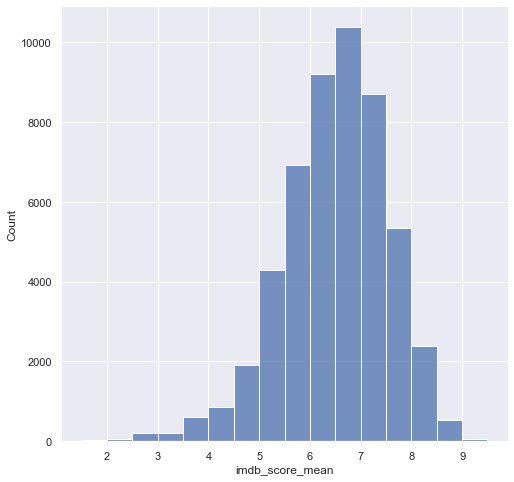

In [102]:
sns.histplot(data = credits_stats, x = "imdb_score_mean", binwidth= 0.5)

<AxesSubplot:xlabel='imdb_score_range', ylabel='Count'>

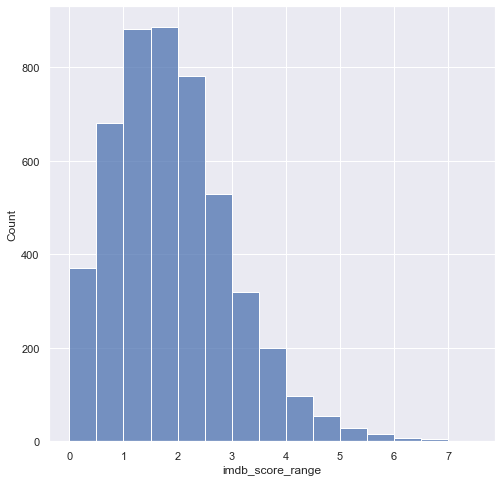

In [103]:
sns.histplot(data = credits_stats[(credits_stats.movie_count + credits_stats.show_count) > 2], x = "imdb_score_range", binwidth= 0.5)

<AxesSubplot:xlabel='imdb_score_mean', ylabel='imdb_votes_log_mean'>

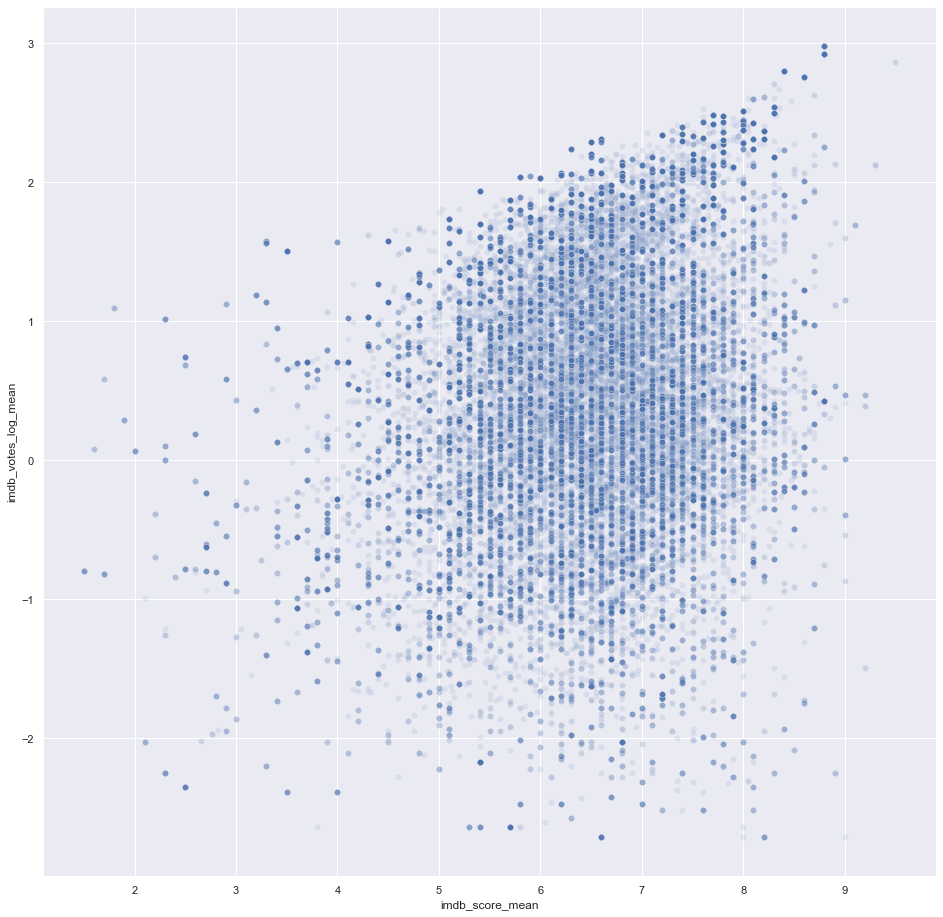

In [104]:
plt.figure(figsize=(16, 16))
sns.scatterplot(data = credits_stats, x = "imdb_score_mean", y = "imdb_votes_log_mean", alpha = 0.1)

## TO-DO


- Fazer avaliação de `score`, `runtime`, etc com `hue` = `countries/genres`
- Fazer uma função pra descobrir combinação de `countries/genres` mais populares/aclamados
    - **tenho a tabela de covariância, como usar?**
- Talvez fazer bins p/ avaliações, ver progressão temporal e tals
- Diminuir qtd. de `classificações` p/ avaliar influência
- Pensar nos machine-learnings possíveis
    - previsão de avaliação baseado em ator/diretor/gênero
    - algo de recomendação (como?)
    - ???

## Progress

### Data Tidying **OK**

- `genres` to dummies **OK**
- `production_countries` to dummies **OK**
- `age_certification` to simplified ordered cat **OK**
- `imdb_votes` & `tmdb_popularity` transform **OK**

### EDA

#### Dataset Distribution
- %`runtime` **OK**
- %`seasons` **OK**
- `release_year` distribution **OK**


#### Credits
- `person_id` aggregates **OK**
    - `score` & `popularity` **OK**
    - colaborations *TO-DO*
    - graphical analysis *TO-DO*

#### Genres & Countries
- get/plot correlation-covariance **OK**
- get main genre to titles *TO-DO*
- get popular cross-genres *DOING*

